In [21]:
import ROOT
import JupyROOT.helpers.utils
JupyROOT.helpers.utils.GetGeometryDrawer = lambda:None # magic fix to make ROOT faster
from pathlib import Path
import matplotlib.pyplot as plt
import hist
import mplhep as hep
import numpy as np

In [19]:
def full_load_dir(d_list, NMAX=30):
    if isinstance(d_list, str): d_list = [d_list]
    chain = ROOT.TChain("Events")
    i = 0
    files = []
    for d in d_list:
        for path in Path(d).glob('*.root'):
            if "_up" in path.name or "_down" in path.name: continue
            files.append(str(path))
    for f in files[:NMAX]:
        chain.Add(f)
    print("Starting")
    df = ROOT.RDataFrame(chain)
    ROOT.RDF.Experimental.AddProgressBar(df)
    return df.Define("madHT", "LHE_HTIncoming - ROOT::VecOps::Sum(LHEPart_pt[LHEPart_status==1 && ROOT::VecOps::abs(LHEPart_pdgId)==6])").AsNumpy(["genWeightFixed", "madHT"]), min(NMAX, len(files))/len(files)


In [41]:
tt_sl, tt_sl_factor = full_load_dir("/grid_mnt/data__data.polcms/cms/cuisset/cmt/PreprocessRDF/bul_2018_ZZ_v12/tt_dl/cat_base_selection/prod_250315")
tt_sl

Starting


{'genWeightFixed': ndarray([72.6983, 72.6983, 72.6983, ..., 72.6983, 72.6983, 72.6983],
         dtype=float32),
 'madHT': ndarray([ 27.342604,  97.92001 ,  14.542168, ..., 142.40057 ,  20.20924 ,
          105.55192 ], dtype=float32)}

|=======================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

In [ ]:
tt_ht600, tt_ht600_factor = full_load_dir("/grid_mnt/data__data.polcms/cms/cuisset/cmt/PreprocessRDF/bul_2018_ZZ_v12/tt_ht600/cat_base_selection/prod_250315")
tt_ht600_factor

/grid_mnt/data__data.polcms/cms/cuisset/cmt/PreprocessRDF/bul_2018_ZZ_v12/tt_ht600/cat_base_selection/prod_250315/data_9.root
/grid_mnt/data__data.polcms/cms/cuisset/cmt/PreprocessRDF/bul_2018_ZZ_v12/tt_ht600/cat_base_selection/prod_250315/data_6.root
/grid_mnt/data__data.polcms/cms/cuisset/cmt/PreprocessRDF/bul_2018_ZZ_v12/tt_ht600/cat_base_selection/prod_250315/data_0.root
/grid_mnt/data__data.polcms/cms/cuisset/cmt/PreprocessRDF/bul_2018_ZZ_v12/tt_ht600/cat_base_selection/prod_250315/data_5.root
/grid_mnt/data__data.polcms/cms/cuisset/cmt/PreprocessRDF/bul_2018_ZZ_v12/tt_ht600/cat_base_selection/prod_250315/data_4.root
/grid_mnt/data__data.polcms/cms/cuisset/cmt/PreprocessRDF/bul_2018_ZZ_v12/tt_ht600/cat_base_selection/prod_250315/data_3.root
/grid_mnt/data__data.polcms/cms/cuisset/cmt/PreprocessRDF/bul_2018_ZZ_v12/tt_ht600/cat_base_selection/prod_250315/data_8.root
/grid_mnt/data__data.polcms/cms/cuisset/cmt/PreprocessRDF/bul_2018_ZZ_v12/tt_ht600/cat_base_selection/prod_250315/data

In [35]:
tt_ht800, tt_ht800_factor = full_load_dir("/grid_mnt/data__data.polcms/cms/cuisset/cmt/PreprocessRDF/bul_2018_ZZ_v12/tt_ht800/cat_base_selection/prod_250315")
tt_ht800_factor

Starting


1.0

|======================================================================================>                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                

In [42]:
len(tt_ht600["genWeightFixed"]), np.count_nonzero((tt_sl["madHT"]>600) & (tt_sl["madHT"]<800))/tt_sl_factor

(781555, 23042.933333333334)

In [44]:
len(tt_ht800["genWeightFixed"]), np.count_nonzero((tt_sl["madHT"]>800) & (tt_sl["madHT"]<1200))/tt_sl_factor

(623607, 9079.633333333333)

In [45]:
623607/9079.633333333333

68.68195852255414

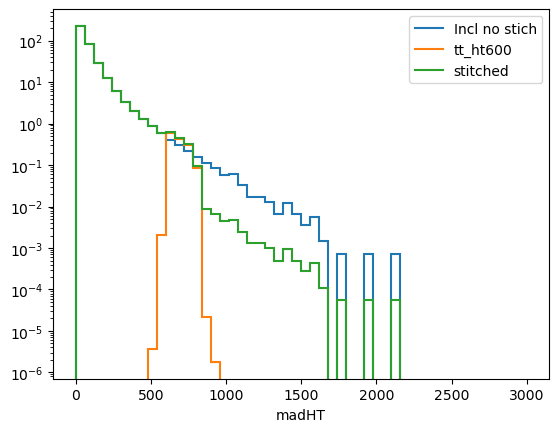

In [34]:
hep.histplot(hist.new.Regular(50, 0., 3000, name="madHT").Weight().fill(tt_sl["madHT"], weight=365.34*tt_sl["genWeightFixed"]/np.sum(tt_sl["genWeightFixed"])), yerr=False, label="Incl no stich")
hep.histplot(hist.new.Regular(50, 0., 3000, name="madHT").Weight().fill(tt_ht600["madHT"], weight=1.402*tt_ht600["genWeightFixed"]/np.sum(tt_ht600["genWeightFixed"])), yerr=False, label="tt_ht600")

hep.histplot(
    hist.new.Regular(50, 0., 3000, name="madHT").Weight()
    .fill(tt_sl["madHT"], weight=365.34*tt_sl["genWeightFixed"]*np.where(tt_sl["madHT"]<600, 1., 1./(781555/59383.0))/np.sum(tt_sl["genWeightFixed"]))
    .fill(tt_ht600["madHT"], weight=1.402*tt_ht600["genWeightFixed"]/np.sum(tt_ht600["genWeightFixed"]))
, yerr=False, label="stitched")
plt.yscale("log")
plt.legend()

(array([2.0000e+00, 0.0000e+00, 2.0000e+00, 1.0000e+00, 2.0000e+00,
        0.0000e+00, 1.0000e+00, 2.0000e+00, 6.0000e+00, 7.0000e+00,
        1.1000e+01, 1.0000e+01, 1.4000e+01, 3.5000e+01, 9.3000e+01,
        2.4800e+02, 1.0592e+04, 2.4532e+04, 2.4168e+04, 2.3702e+04,
        2.3296e+04, 2.2973e+04, 2.2327e+04, 2.1717e+04, 2.1356e+04,
        2.0815e+04, 2.0303e+04, 1.9902e+04, 1.9679e+04, 1.9343e+04,
        1.8637e+04, 1.8307e+04, 1.7933e+04, 1.7758e+04, 1.7099e+04,
        1.6829e+04, 1.6611e+04, 1.6107e+04, 1.5900e+04, 1.5725e+04,
        1.5117e+04, 1.4678e+04, 1.4538e+04, 1.4296e+04, 1.3967e+04,
        1.3531e+04, 1.3667e+04, 1.3125e+04, 1.3035e+04, 1.2545e+04,
        1.2090e+04, 1.1975e+04, 1.2063e+04, 1.1753e+04, 1.1366e+04,
        1.1087e+04, 1.0978e+04, 1.0715e+04, 1.0640e+04, 1.0400e+04,
        9.9590e+03, 9.7880e+03, 9.6750e+03, 9.4690e+03, 9.2220e+03,
        9.0820e+03, 6.5180e+03, 1.3900e+02, 2.8000e+01, 1.8000e+01,
        1.1000e+01, 6.0000e+00, 6.0000e+00, 6.00

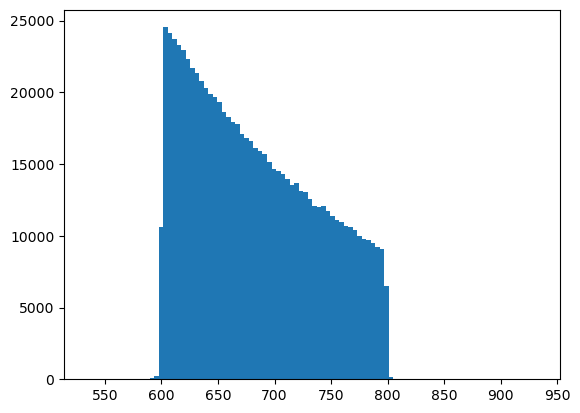

In [28]:
plt.hist(tt_ht600["madHT"], bins=100)